In [29]:
#!pip install plotly

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [32]:
matches=pd.read_csv('../data/matches.csv')   
delivery=pd.read_csv('../data/deliveries.csv')

In [33]:
matches.drop(['umpire3'], axis=1, inplace=True)
delivery.fillna(0, inplace=True)

#Some Cleaning And Transformation

In [34]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [35]:
matches.replace(
    ['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings',
     'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
     'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Pune Warriors',
     'Rising Pune Supergiant']
    , ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW', 'RPS'], inplace=True)

delivery.replace(
    ['Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings',
     'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
     'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Pune Warriors',
     'Rising Pune Supergiant']
    , ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW', 'RPS'], inplace=True)

matches_played_teams = pd.concat([matches['team1'], matches['team2']])
matches_played_teams = matches_played_teams.value_counts().reset_index()
matches_played_teams.columns = ['Team', 'Total Matches']
matches_played_teams['wins'] = matches['winner'].value_counts().reset_index()['winner']
matches_played_teams.set_index('Team', inplace=True)

In [36]:
marker1 = go.bar.Marker(
    color='#f1a340'
)

marker2 = go.bar.Marker(
    color='#998ec3'
)

trace1 = go.Bar(
    x=matches_played_teams.index,
    y=matches_played_teams['Total Matches'],
    name='Total Matches',
    marker=marker1
)
trace2 = go.Bar(
    x=matches_played_teams.index,
    y=matches_played_teams['wins'],
    name='Matches Won',
    marker=marker2
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)


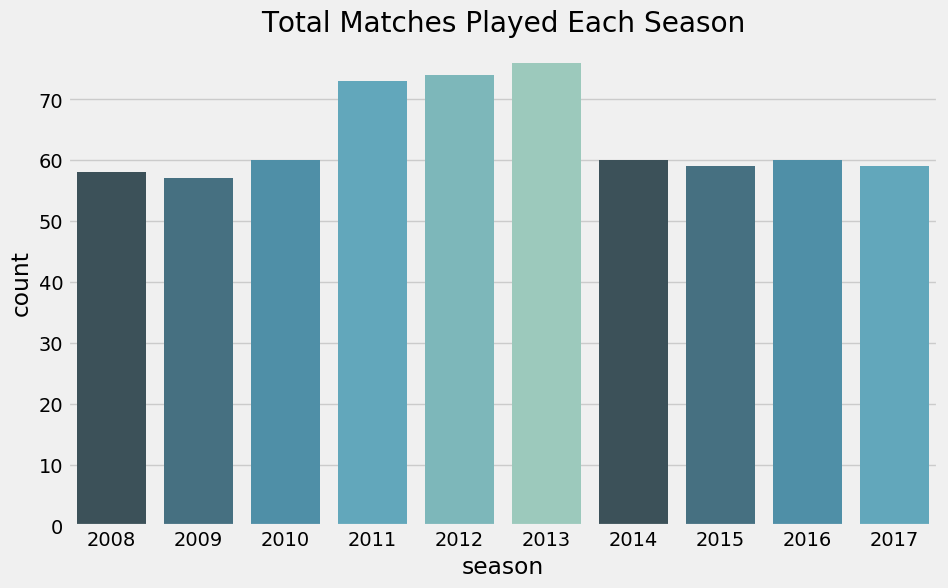

<Figure size 640x480 with 0 Axes>

In [37]:
fig = go.Figure(data=data, layout=layout)
# py.plot(fig, filename='./eda_plots/teamwise_wins.html')

# Total Matches Played Each Season
plt.subplots(figsize=(10, 6))
sns.countplot(x='season', data=matches, palette=sns.color_palette("GnBu_d"))
plt.title('Total Matches Played Each Season')
plt.show()
plt.clf()

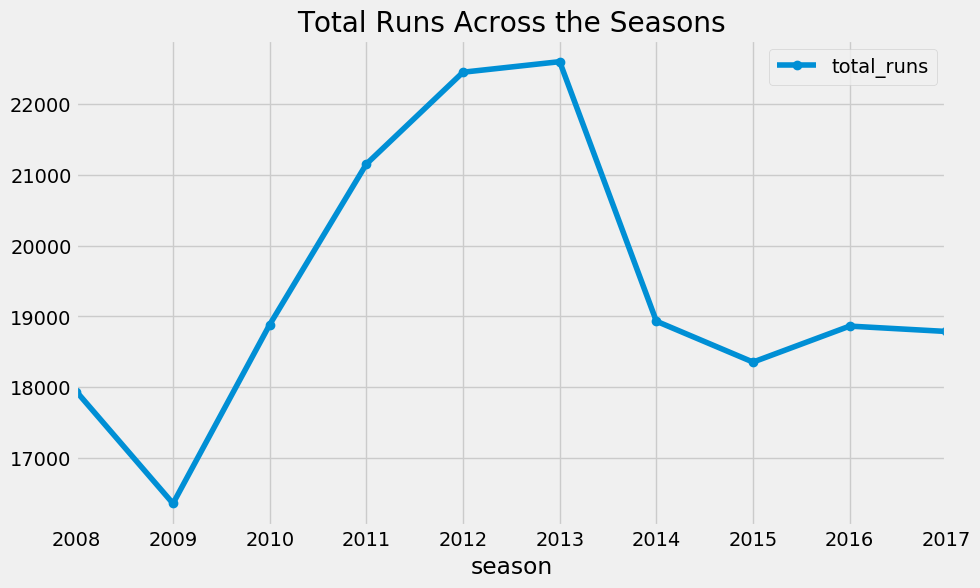

<Figure size 640x480 with 0 Axes>

In [38]:
# Average Runs Per Match Each Seasons
batsmen = matches[['id', 'season']].merge(delivery, left_on='id', right_on='match_id', how='left').drop('id', axis=1)
# merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(10, 6)
plt.title('Total Runs Across the Seasons')
#plt.savefig('./eda_plots/total_runs_across_seasons.png')
plt.show()
plt.clf()

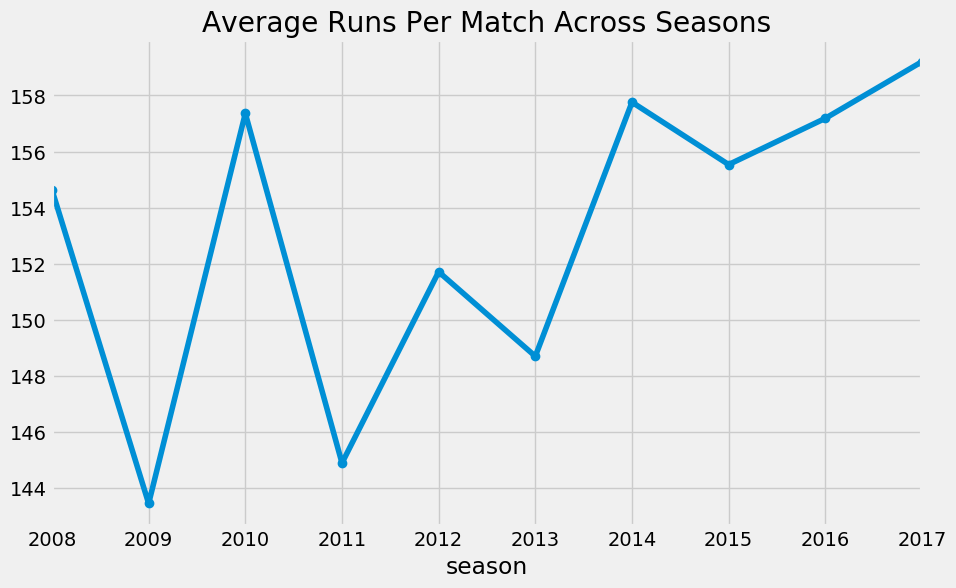

<Figure size 640x480 with 0 Axes>

In [39]:
plt.subplots(figsize=(10, 6))
avgruns_each_season = matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id': 'matches'}, inplace=1)
avgruns_each_season['total_runs'] = season['total_runs']
avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches'] / 2
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
plt.gcf().set_size_inches(10, 6)
plt.title('Average Runs Per Match Across Seasons')
plt.show()
#plt.savefig('./eda_plots/average_runs_per_match_across_seasons.png')
plt.clf()

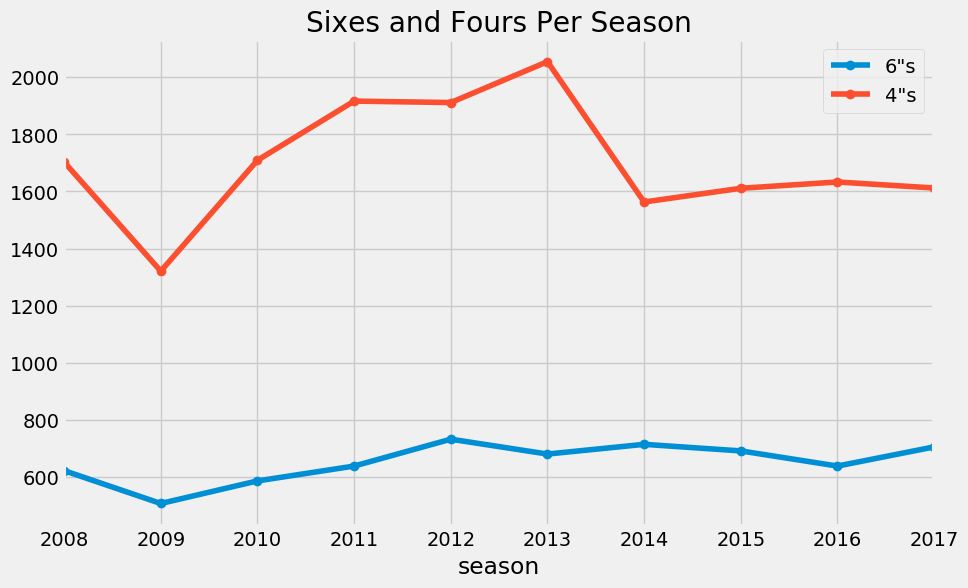

<Figure size 640x480 with 0 Axes>

In [40]:
# Sixes and Fours Per Season
Season_boundaries = batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x == 6).sum()).reset_index()
a = batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x == 4).sum()).reset_index()
Season_boundaries = Season_boundaries.merge(a, left_on='season', right_on='season', how='left')
Season_boundaries = Season_boundaries.rename(columns={'batsman_runs_x': '6"s', 'batsman_runs_y': '4"s'})
Season_boundaries.set_index('season')[['6"s', '4"s']].plot(marker='o')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Sixes and Fours Per Season')
plt.show()
#plt.savefig('./eda_plots/sixes_fours_per_seasons.png')
plt.clf()

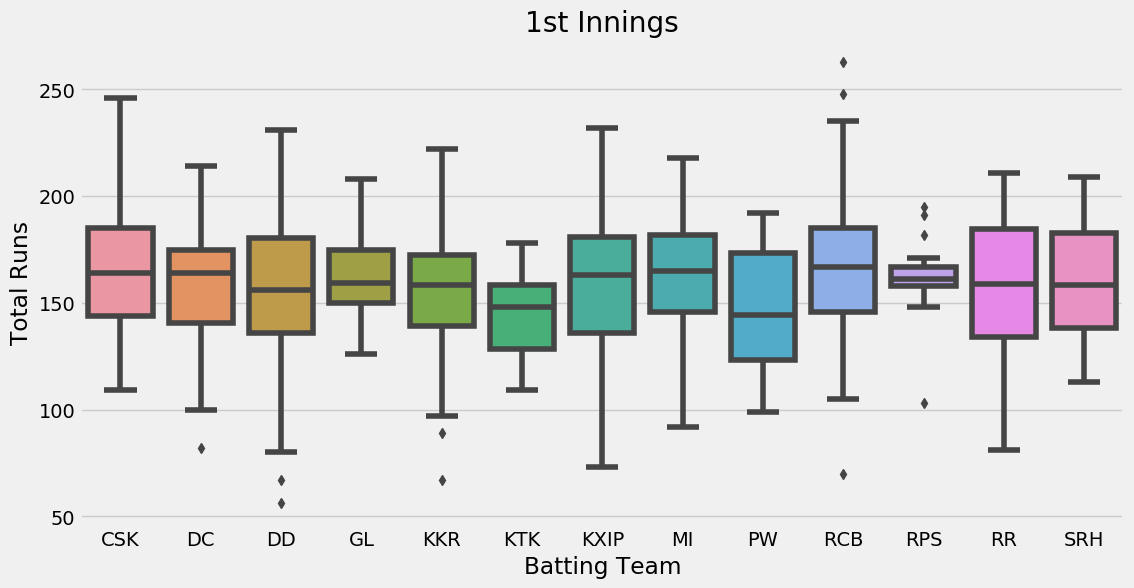

<Figure size 640x480 with 0 Axes>

In [41]:
# Score Distribution For Teams by Innings
plt.subplots(figsize=(12, 6))
xyz = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id', axis=1, inplace=True)
xyz = xyz.sort_values(by=['batting_team', 'total_runs'], ascending=True)
score_1_inning = xyz[xyz['inning'] == 1]
score_2_inning = xyz[xyz['inning'] == 2]
sns.boxplot(x='batting_team', y='total_runs', data=score_1_inning).set_title('1st Innings')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
#plt.savefig('./eda_plots/first_innings.png')
plt.clf()

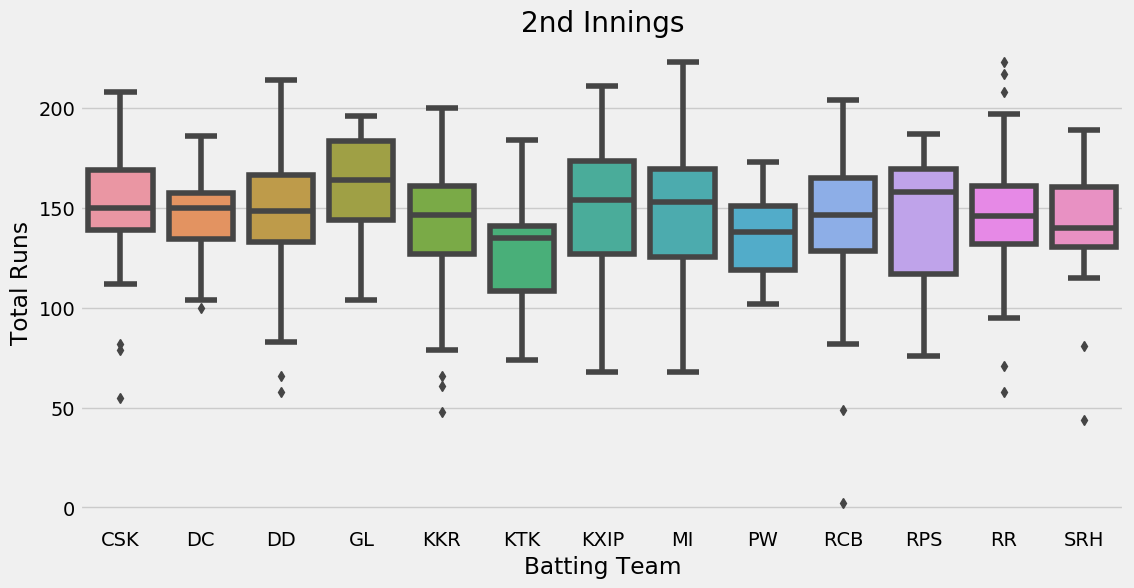

<Figure size 640x480 with 0 Axes>

In [42]:
sns.boxplot(x='batting_team', y='total_runs', data=score_2_inning).set_title('2nd Innings')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
#plt.savefig('./eda_plots/second_innings.png')
plt.clf()

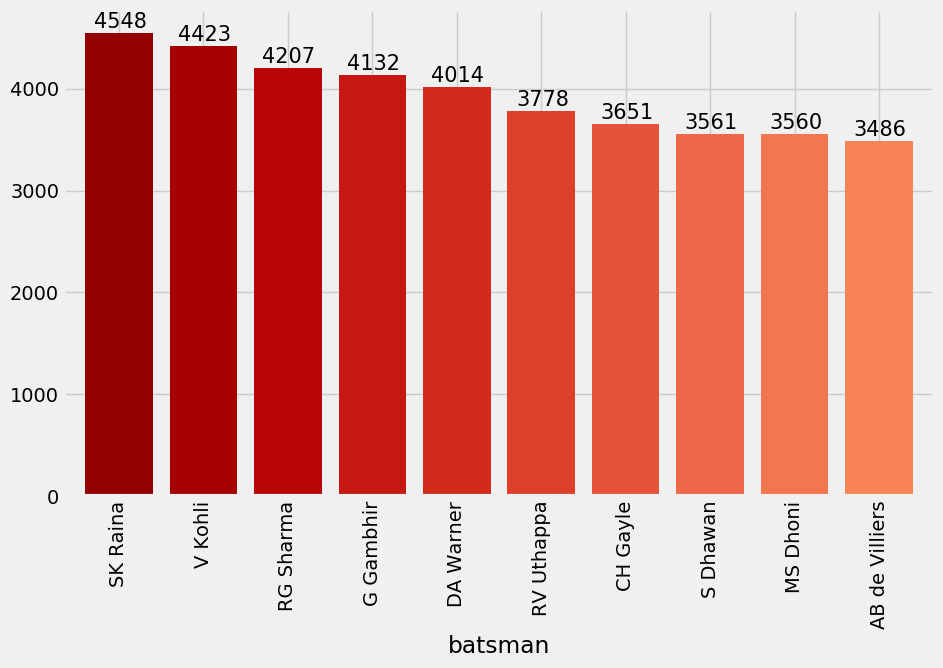

<Figure size 640x480 with 0 Axes>

In [43]:
# Batsman Comparator
balls = delivery.groupby(['batsman'])['ball'].count().reset_index()
runs = delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls = balls.merge(runs, left_on='batsman', right_on='batsman', how='outer')
balls.rename({'ball': 'ball_x', 'batsman_runs': 'ball_y'}, axis=1, inplace=True)
sixes = delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()
fours = delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()
balls['strike_rate'] = balls['ball_y'] / balls['ball_x'] * 100
balls = balls.merge(sixes, left_on='batsman', right_on='batsman', how='outer')
balls = balls.merge(fours, left_on='batsman', right_on='batsman', how='outer')
compare = delivery.groupby(["match_id", "batsman", "batting_team"])["batsman_runs"].sum().reset_index()
compare = compare.groupby(['batsman', 'batting_team'])['batsman_runs'].max().reset_index()
balls = balls.merge(compare, left_on='batsman', right_on='batsman', how='outer')
balls.rename(
    {'ball_x': 'balls', 'ball_y': 'runs', 'batsman_runs_x': "6's", 'batsman_runs_y': "4's", 'batting_team': 'Team',
     'batsman_runs': 'Highest_score'}, axis=1, inplace=True)
balls.head()

plt.subplots(figsize=(10, 6))
max_runs = delivery.groupby(['batsman'])['batsman_runs'].sum()
axis = max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8, color=sns.color_palette("OrRd_r", 20))
for p in axis.patches:
    axis.annotate(format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50), fontsize=15)
plt.show()
#plt.savefig('./eda_plots/batsman_top_10_score.png')
plt.clf()

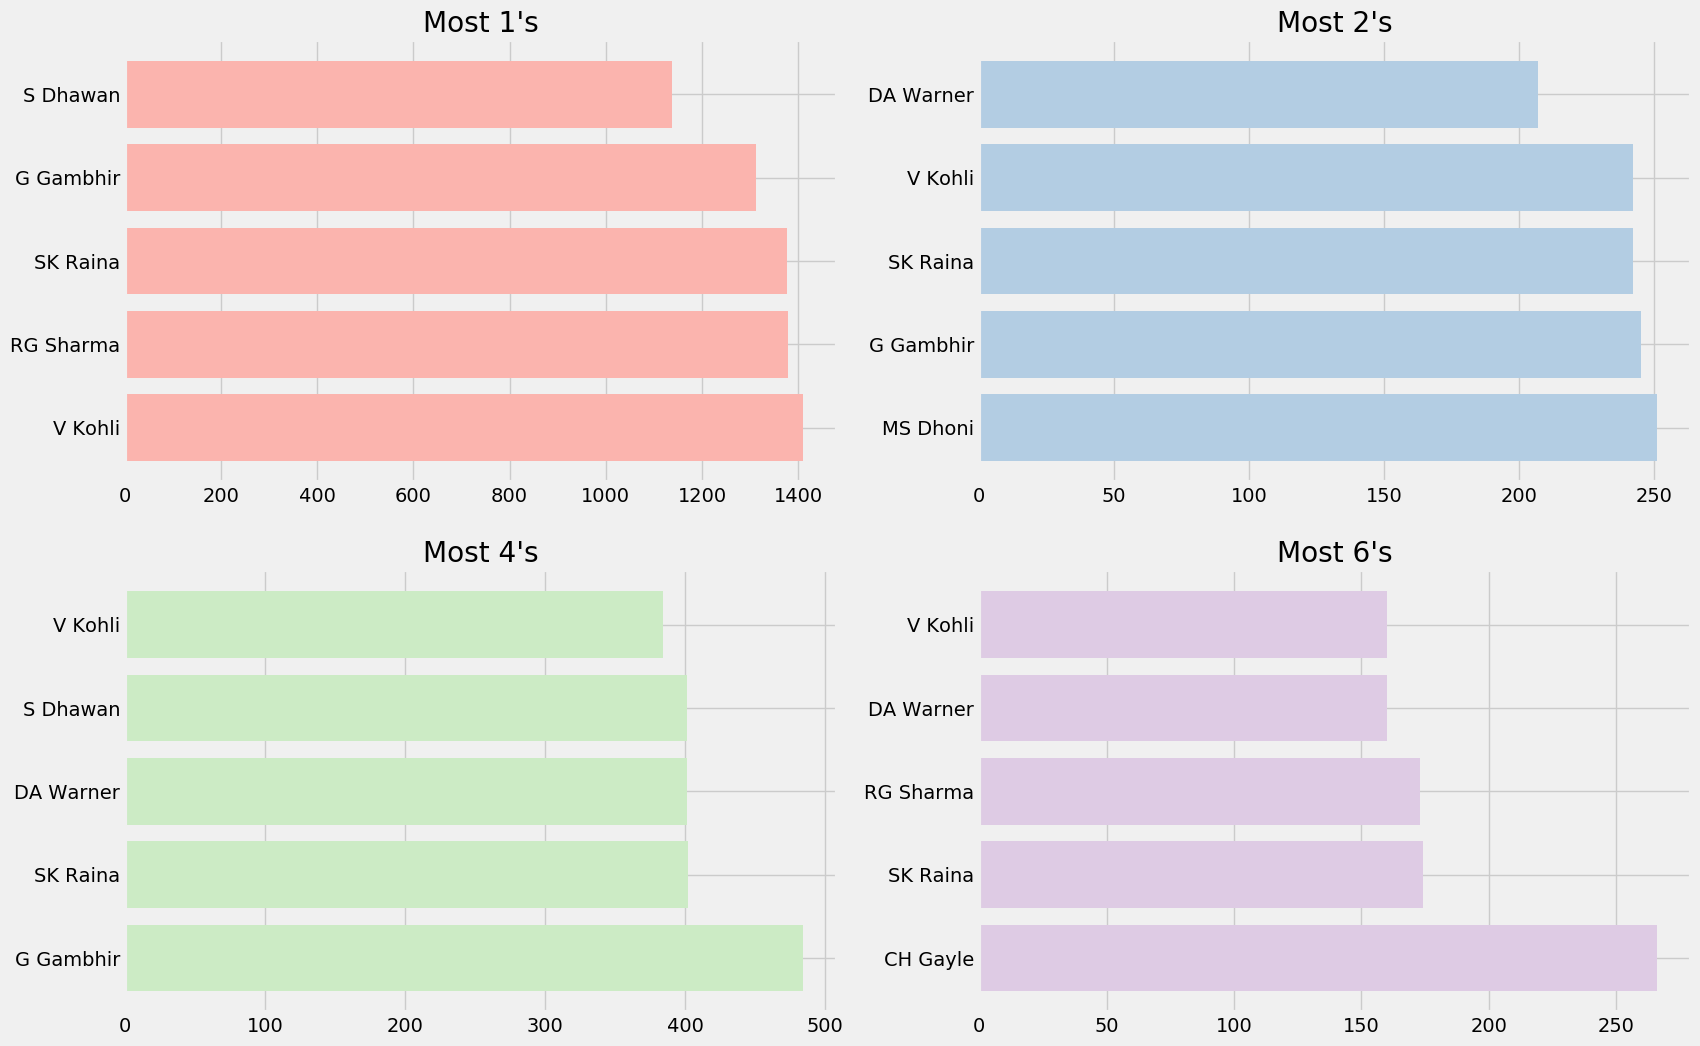

<Figure size 640x480 with 0 Axes>

In [44]:
# Top Batsman's with 1's, 2's, 3's, 4's
toppers = delivery.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()
toppers = toppers.pivot('batsman', 'batsman_runs', 'total_runs')
fig, axis = plt.subplots(2, 2, figsize=(18, 12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh', ax=axis[0, 0], color='#fbb4ae', width=0.8)
axis[0, 0].set_title("Most 1's")
axis[0, 0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh', ax=axis[0, 1], color='#b3cde3', width=0.8)
axis[0, 1].set_title("Most 2's")
axis[0, 1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh', ax=axis[1, 0], color='#ccebc5', width=0.8)
axis[1, 0].set_title("Most 4's")
axis[1, 0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh', ax=axis[1, 1], color='#decbe4', width=0.8)
axis[1, 1].set_title("Most 6's")
axis[1, 1].set_ylabel('')
plt.show()
#plt.savefig('./eda_plots/runs_split_top_batsman.png')
plt.clf()

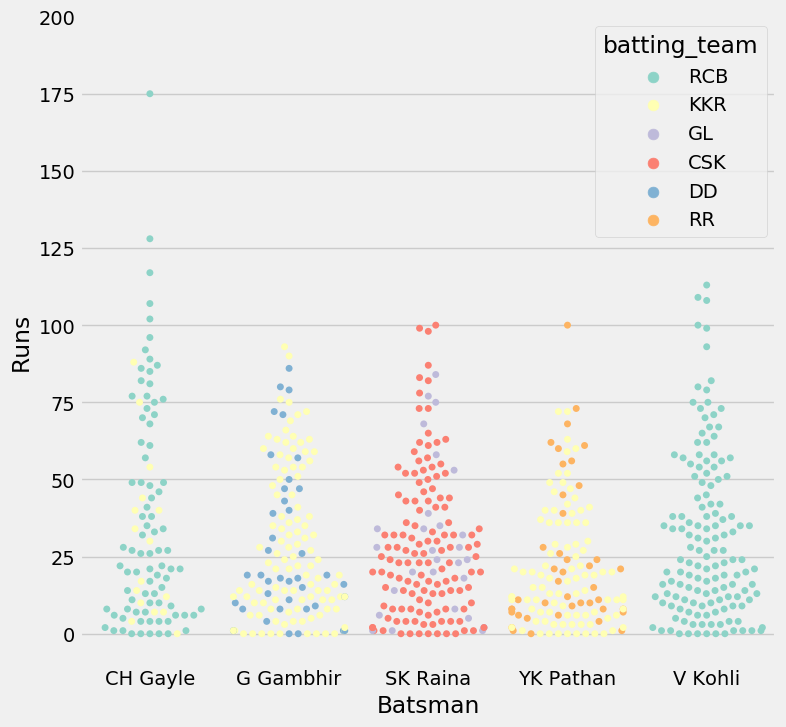

<Figure size 640x480 with 0 Axes>

In [45]:
# Individual Scores By Top Batsman each Inning
top_scores = delivery.groupby(["match_id", "batsman", "batting_team"])["batsman_runs"].sum().reset_index()
top_scores.sort_values('batsman_runs', ascending=0)

swarm = ['CH Gayle', 'V Kohli', 'G Gambhir', 'SK Raina', 'YK Pathan']  # ,'MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman", "batting_team"])["batsman_runs"].sum().reset_index()
scores = scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman', y='batsman_runs', data=scores, hue='batting_team', palette='Set3')
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.ylim(-10, 200)
plt.show()
#plt.savefig('./eda_plots/top_batsman.png')
plt.clf()

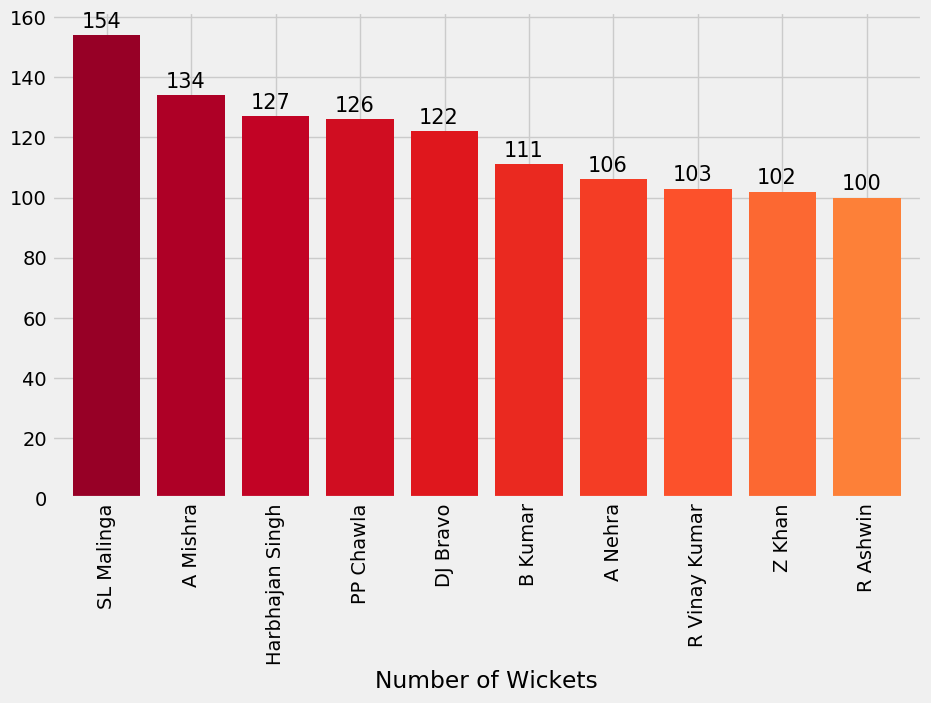

<Figure size 640x480 with 0 Axes>

In [46]:
# Bowler Stats
plt.subplots(figsize=(10, 6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled",
                   "hit wicket"]  # since run-out is not creditted to the bowler
ct = delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
axis = ct['bowler'].value_counts()[:10].plot.bar(width=0.8, color=sns.color_palette("YlOrRd_r", 20))
for p in axis.patches:
    axis.annotate(format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 2.5), fontsize=15)
plt.xlabel("Number of Wickets")
plt.show()
#plt.savefig('./eda_plots/top_bowlers.png')
plt.clf()